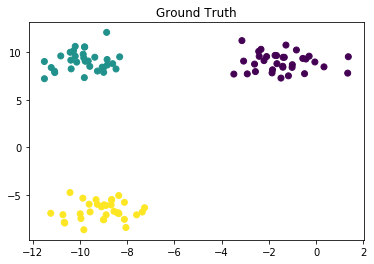

In [20]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# create toy datasets for cluster experiments
n_clusters = 3
n_samples = 100
data = []
data.append(datasets.make_circles(n_samples, factor=0.5, noise=0.05))
data.append(datasets.make_moons(n_samples, noise=0.05))
data.append(datasets.make_blobs(n_samples, centers=3, n_features=2))

X, y = data[2]

def plot_results(X, y, title):
    plt.title(title)    
    plt.scatter(X[:,0], X[:,1], c = y)
    plt.show()
    
plot_results(X, y, "Ground Truth")

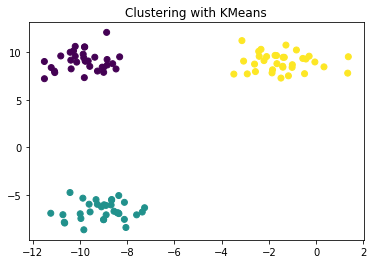

In [21]:
# try clustering with KMeans for comparision
km = KMeans(n_clusters)
km.fit(X)
y_pred = km.labels_

# plot results
plot_results(X, y_pred, "Clustering with KMeans")

In [22]:
from numpy.linalg import norm
from math import exp

# compute the affinity of samples X1, X2
def affinity_kernel(x1, x2):
    sigma_sq = .1
    return exp(-(norm(x1-x2)**2)/(2*sigma_sq))

# construct affinity matrix
A = np.zeros((len(X), len(X)))
for i in range(len(X)-1):
    for j in range(i+1, len(X)):
        A[i,j] = affinity_kernel(X[i], X[j])
        A[j,i] = A[i,j]

# print affinity matrix
np.set_printoptions(precision=2)
print(A)

[[0.00e+000 2.70e-027 0.00e+000 ... 5.64e-040 3.62e-103 0.00e+000]
 [2.70e-027 0.00e+000 0.00e+000 ... 1.55e-069 1.36e-102 0.00e+000]
 [0.00e+000 0.00e+000 0.00e+000 ... 0.00e+000 0.00e+000 1.52e-009]
 ...
 [5.64e-040 1.55e-069 0.00e+000 ... 0.00e+000 2.90e-266 0.00e+000]
 [3.62e-103 1.36e-102 0.00e+000 ... 2.90e-266 0.00e+000 0.00e+000]
 [0.00e+000 0.00e+000 1.52e-009 ... 0.00e+000 0.00e+000 0.00e+000]]


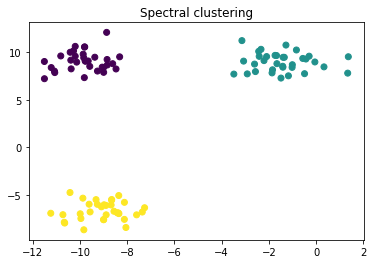

In [27]:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def spectral_clustering(weighted_graph, cluster_count):
    W = weighted_graph
    K = cluster_count
    
    # Construct diagonal degree matrix
    D = np.zeros(A.shape)
    for i in range(A.shape[0]):
        D[i,i] = np.sum(A[i,:])
        
    # Construct Symmetric Laplacian Matrix:
    Dinvsq = np.sqrt(np.linalg.inv(D))
    I = np.matlib.identity(A.shape[0])
    L = I - Dinvsq @ A @ Dinvsq
    
    # Find the K largest(smallets?) eigenvectors of L
    eigvals, eigvects = np.linalg.eigh(L)
    best_eigens = [i for i in range(K)]
    
    U = np.zeros((L.shape[0], K))
    U[:,:] = eigvects[:,best_eigens]
    
    # normalize new eigenvector-column-matrix
    T = (U.T / np.linalg.norm(U, axis=1)).T
    
    # Finally, do clustering on reduced space using KMeans:
    km = KMeans(n_clusters = K, n_init=20)
    km.fit(T)
    y_pred = km.labels_ #1 if x > 0 else 0 for x in T
    return y_pred

clusters = spectral_clustering(A, n_clusters)
plot_results(X, clusters, "Spectral clustering")